In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np

In [10]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/PicoGreen_Plots/20240317_PicoGreen_water.xlsx' 
sheet_name = 'Sheet2' 
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [11]:
polyplex = df['Polymer'][::-1]
avg = df['Avg. %'][::-1]
stdev = df['Final std'][::-1]

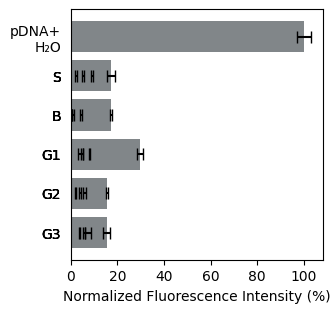

In [12]:
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

plt.barh(polyplex, avg, xerr=stdev, capsize = 4, color=color_gray)
plt.yticks(df['Polymer'], size=10)
plt.xticks(size=10)
plt.tick_params(left=False)
plt.xlabel('Normalized Fluorescence Intensity (%)', size=10)

plt.show()

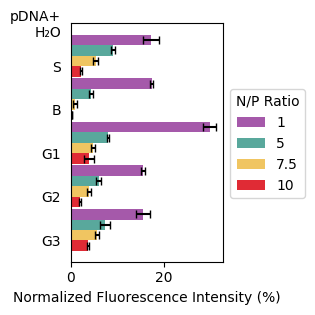

In [16]:
polymer_order = ['pDNA+\nH₂O', 'S', 'B', 'G1', 'G2', 'G3']
df['Polymer'] = pd.Categorical(df['Polymer'], categories=polymer_order, ordered=True)
df_zeta_sorted = df.sort_values(by=['Polymer', 'N/P ratio'])

fig, ax = plt.subplots(figsize=(3.25, 3.25))
bar_width = 0.24  
larger_bar_width = 0.3
unique_polymers = df_zeta_sorted['Polymer'].unique()
unique_ratios = df_zeta_sorted['N/P ratio'].unique()
positions = np.arange(len(polymer_order))  

colors = {
    '0.0': '#082a54',   
    '1.0': '#a559aa',   
    '5.0': '#59a89c',   
    '7.5': '#f0c561',   
    '10.0': '#e02b35'   
}

legend_dict = {}

for j, polymer in enumerate(polymer_order):
    for i, ratio in enumerate(unique_ratios):
        polymer_data = df_zeta_sorted[(df_zeta_sorted['Polymer'] == polymer) & (df_zeta_sorted['N/P ratio'] == ratio)]

        if not polymer_data.empty:
            position = positions[j] - bar_width * (len(unique_ratios) / 2 - i)
            color = colors[str(ratio)]
            bar_height = larger_bar_width if polymer == 'pDNA+\nH₂O' else bar_width
            bar = ax.barh(position, polymer_data['Avg. %'].mean(), xerr=polymer_data['Final std'].mean(), 
                          color=color, height=bar_height, capsize=3)
            
            if ratio not in legend_dict:
                legend_dict[ratio] = bar

legend_handles = []
legend_labels = []

for ratio, bar_container in legend_dict.items():
    if len(bar_container.patches) > 0:
        first_bar = bar_container.patches[0]
        legend_handles.append(first_bar)
        
        if ratio == 7.5 or ratio == '7.5':
            legend_labels.append('7.5')
        else:
            legend_labels.append(str(int(float(ratio)))) 

ax.set_yticks(positions)
ax.set_yticklabels(polymer_order)
ax.invert_yaxis() 
ax.set_xlabel('Normalized Fluorescence Intensity (%)')
ax.legend(handles=legend_handles, labels=legend_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor=(1, 0.75))
ax.tick_params(axis='y', which='both', left=False)  

plt.tight_layout()
plt.show()

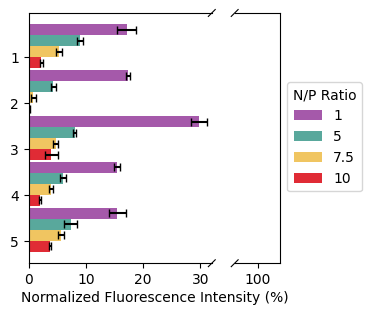

In [14]:
polymer_order = ['pDNA+\nH₂O', 'S', 'B', 'G1', 'G2', 'G3']
df['Polymer'] = pd.Categorical(df['Polymer'], categories=polymer_order, ordered=True)
df_zeta_sorted = df.sort_values(by=['Polymer', 'N/P ratio'])
fig = plt.figure(figsize=(3.25, 3.25))
bax = brokenaxes(xlims=((0, 32), (96, 104)), hspace=.05, fig=fig, despine=False)
bar_width = 0.24  
larger_bar_width = 0.4
unique_polymers = df_zeta_sorted['Polymer'].unique()
unique_ratios = df_zeta_sorted['N/P ratio'].unique()
positions = np.arange(len(polymer_order))  

colors = {
    '0.0': '#082a54',   
    '1.0': '#a559aa',   
    '5.0': '#59a89c',   
    '7.5': '#f0c561',   
    '10.0': '#e02b35'   
}
legend_dict = {}

for j, polymer in enumerate(polymer_order):
    for i, ratio in enumerate(unique_ratios):
        polymer_data = df_zeta_sorted[(df_zeta_sorted['Polymer'] == polymer) & (df_zeta_sorted['N/P ratio'] == ratio)]
        
        if not polymer_data.empty:
            position = positions[j] - bar_width * (len(unique_ratios) / 2 - i)
            color = colors[str(ratio)]
            bar_height = larger_bar_width if polymer == 'pDNA+\nH₂O' else bar_width
            bar = bax.barh(position, polymer_data['Avg. %'].mean(), xerr=polymer_data['Final std'].mean(), 
                           color=color, height=bar_height, capsize=3)
            
            if ratio not in legend_dict:
                legend_dict[ratio] = bar


#bax.set_yticks(positions)
#bax.set_yticklabels(polymer_order)
bax.invert_yaxis() 
bax.set_xlabel('Normalized Fluorescence Intensity (%)', labelpad=20)
bax.legend(legend_handles, legend_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor=(1, 0.75))
 
plt.show()

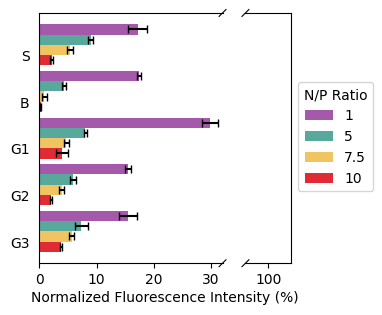

In [15]:
fig = plt.figure(figsize=(3.25, 3.25))
bax = brokenaxes(xlims=((0, 32), (96, 104)), hspace=.05, fig=fig, despine=False)
bar_width = 0.22  
larger_bar_width = 0.4

colors = {
    '0.0': '#082a54',   
    '1.0': '#a559aa',   
    '5.0': '#59a89c',   
    '7.5': '#f0c561',   
    '10.0': '#e02b35'   
}
legend_dict = {}

for j, polymer in enumerate(polymer_order):
    for i, ratio in enumerate(unique_ratios):
        polymer_data = df_zeta_sorted[(df_zeta_sorted['Polymer'] == polymer) & (df_zeta_sorted['N/P ratio'] == ratio)]
        
        if not polymer_data.empty:
            position = positions[j] - bar_width * (len(unique_ratios) / 2 - i)
            color = colors[str(ratio)]
            bar_height = larger_bar_width if polymer == 'pDNA+\nH₂O' else bar_width
            bar = bax.barh(position, polymer_data['Avg. %'].mean(), xerr=polymer_data['Final std'].mean(), 
                           color=color, height=bar_height, capsize=3)
            
            if ratio not in legend_dict:
                legend_dict[ratio] = bar[1]


positions_and_labels = {
    -0.5: 'pDNA+\nH₂O',
    1: 'S',
    2: 'B',
    3: 'G1',
    4: 'G2',
    5: 'G3'
}

for splot in bax.axs:
    
    ylims = splot.get_ylim()
    visible_positions = [pos for pos in positions_and_labels if ylims[0] <= pos <= ylims[1]]
    visible_labels = [positions_and_labels[pos] for pos in visible_positions]
    
    splot.set_yticks(visible_positions)
    splot.set_yticklabels(visible_labels)
    splot.invert_yaxis()
    splot.tick_params(left=False)

bax.set_xlabel('Normalized Fluorescence Intensity (%)', labelpad=20)
bax.legend(legend_handles, legend_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor=(1, 0.75))
plt.show()